In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
# import cartopy.crs as ccrs
import calendar
import glob
from scipy import stats
from skmisc.loess import loess

In [2]:
#####Constants
Cp = 1004           #J/kg/K
Rd = 287            #J/kg/K

MERRA2_400.inst3_3d_asm_Np.20160124.SUB.nc
lat_mer (89.5, -89.5) lon_mer (0.5, 359.5) T(time, lev, lat, lon)

In [6]:
def mer(y,m):
    
    globals()['sfcT']     = []
    globals()['seaP']     = []
    globals()['sfcP']     = []
    p700T = []


    var = ['PS', 'SLP', 'T']
    
    for j in range(1,29):
        #####SURFACE
        for i in range(0,len(var)):
            d_path = 'link/potT/merra2_sfc/MERRA2_400.inst3_3d_asm_Np.'+str(y)+f'{m:02d}'+f'{j:02d}'+'.SUB.nc'
            data   = xr.open_dataset(d_path)

            if m==1:
                globals()['lat'] = data.variables['lat'][:]
                globals()['lon'] = data.variables['lon'][:]

            if var[i]=='T':
                globals()[var[i]+'_mer_sfc'] = data.variables[var[i]][:,:,:,:] #T_mer_sfc (time,lev,lat,lon)

            else:
                globals()[var[i]+'_mer_sfc'] = data.variables[var[i]][:,:,:] #PS_mer_sfc (time,lat,lon)

        T_mer_sfc_mean = np.mean(T_mer_sfc,axis=1)

        sfcT.extend(T_mer_sfc_mean)
        seaP.extend(SLP_mer_sfc)
        sfcP.extend(PS_mer_sfc)

        ####700 hPa unit: K
        d_path = 'link/potT/merra2/MERRA2_400.inst3_3d_asm_Np.'+str(y)+f'{m:02d}'+f'{j:02d}'+'.SUB.nc'
        data   = xr.open_dataset(d_path)

        T = data.variables['T'][:,:,:,:]        
        T = np.mean(T,axis=1)
        p700T.extend(T)

    np.savez_compressed('/glade/work/geethma/research/npzfilesn/M/Newm'+f'{m:02d}'+'2016', lat=lat, lon=lon, sfcT=sfcT, p700T=p700T, sfcP=sfcP, seaP=seaP)





In [1]:
# for m in range(1,13):
#     mac(2016,m)

for i in range(11,13):
    mer(2016,i)

wind1deg_maclwpv1.201612.nc4
lat_mac (89.5, -89.5) lon_mac (0.5, 359.5) sfcwind(time, lat, lon)

In [52]:
def mac(y,m):
    
    globals()['sfcwind_mac'] = []
    
    d_path = 'link/MACLWP_dailymean/wind1deg_maclwpv1.'+str(y)+f'{m:02d}'+'.nc4'
    data   = xr.open_dataset(d_path)
    sfcwind= data.variables['sfcwind'][:,:,:]
    lat = data.variables['lat'][:]
    lon = data.variables['lon'][:]
    
    lat_ind1 = np.where(lat == lat[np.abs(lat - (20)).argmin()])[0]
    lat_ind2 = np.where(lat == lat[np.abs(lat - (45)).argmin()])[0]
    lon_ind1 = np.where(lon == lon[np.abs(lon - (275)).argmin()])[0]
    lon_ind2 = np.where(lon == lon[np.abs(lon - (320)).argmin()])[0]
    print(lat_ind1,lat_ind2,lon_ind1,lon_ind2)
    
    for j in range(0,28):
        a = sfcwind[j,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]]

        sfcwind_mac.append(a)
    np.savez_compressed('/glade/work/geethma/research/npzfilesn/macsfcwind/2016/GSm'+f'{m:02d}'+'2016', sfcW=sfcwind_mac)
    

    ###PLOT 'surface wind Vs CAO (Diurnal global mean)'
#     fig = plt.figure()
#     plt.scatter(globals()['CAO_'+str(y)],sfcwind_mac, marker='o', label='MAC-LWP + MERRA2')
# #     plt.title(calendar.month_name[m])
#     plt.xlabel('CAO [K]')
#     plt.ylabel('surface wind (m/s)')
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show

In [4]:
# mac(2016,1)

for i in range(5,13):
    mac(2016,i)

In [26]:
def theta(y):
    
    fn = glob.glob('/glade/work/geethma/research/npzfilesn/M/Newm*npz')
    fn = np.array(fn)
    
    st = []
    pt = []
    sp = []
#     cp = []
    
    for i in range(0,1): #len(fn)
        d = np.load(fn[i])
        print(fn[0])
        lat = d['lat']
        lat_ind1 = np.where(lat == lat.flat[np.abs(lat - (45)).argmin()])[0]
        lat_ind2 = np.where(lat == lat.flat[np.abs(lat - (20)).argmin()])[0]
        
        lon = d['lon']
        lon_ind1 = np.where(lon == lon.flat[np.abs(lon - (275)).argmin()])[0]
        lon_ind2 = np.where(lon == lon.flat[np.abs(lon - (320)).argmin()])[0]
        
        st_temp = (d['sfcT'][:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]])
        pt_temp = (d['p700T'][:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]])
        sp_temp = (d['sfcP'][:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]])
#         cp_temp = np.mean(d['seaP'][:,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]])
        print(lat_ind1,lat_ind2,lon_ind1,lon_ind2,np.shape(st_temp))
        st.extend(st_temp)
        pt.extend(pt_temp)
        sp.extend(sp_temp)
        
        lat = lat[lat_ind1[0]:lat_ind2[0]]
        lon = lon[lon_ind1[0]:lon_ind2[0]]
#         cp.extend(d['seaP'])


    print(np.shape(st))
    print(np.shape(pt))
    print(np.shape(sp))
    ###potential temperature at 700hPa
    theta = np.multiply(pt, ((np.divide(sp,80000))**(Rd/Cp)))
    
    ####potential temperature at surface unit: K
    theta_sfc = st


    ####COLD AIR OUTBREAK INDEX unit: K
    cao = np.subtract(theta_sfc, theta)
    
    ax = plt.axes(projection=ccrs.PlateCarree())
#     ax.set_extent([-85, -41, 20, 50], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, linestyle='--')
    # ax.set_title(modname[i]+' SH')
    im = ax.contourf(lon, lat, cao[0,:,:], cmap='nipy_spectral')
    # plt.plot(145.014659, -37.785922,  markersize=2, marker='o', color='red')
    plt.colorbar(im)
    plt.show()
    
#     np.savez_compressed('/glade/work/geethma/research/npzfilesn/cao/'+str(y)+'/GSM', cao=cao)
  
    

/glade/work/geethma/research/npzfilesn/M/Newm072016.npz
[44] [69] [274] [319] (28, 25, 45)
(28, 25, 45)
(28, 25, 45)
(28, 25, 45)


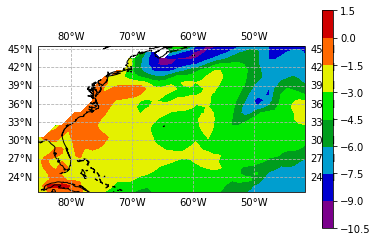

In [27]:
theta(2016)

In [11]:


def plot(y):
    # count = 0
    c = []
    s = []
    cao = []
    sw  = []
    
    fi = glob.glob('/glade/work/geethma/research/npzfilesn/cao/'+str(y)+'/M.npz')
    fi = np.array(fi)
    di = np.load(fi[0])
    cao.extend(di['cao'])
    
    fnn = glob.glob('/glade/work/geethma/research/npzfilesn/macsfcwind/'+str(y)+'/m*npz')
    fnn = np.array(fnn)
    
    for i in range(0,len(fnn)):
        dd = np.load(fnn[i])
        sw.extend(dd['sfcW'])
        
    cao = np.array(cao).reshape(-1)
    sw = np.array(sw).reshape(-1)
    
    print(len(cao),len(sw))
    
    for i in range(len(cao)):
        if np.isnan(cao[i]*sw[i])==False:
            c.append(cao[i])
            s.append(sw[i])
            # count = count+1
            
    print(np.shape(c),np.shape(s))
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(c, s, 'mean', bins=100)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    
    x = np.array(bin_centers[:])
    y = np.array(bin_means[:])
    ind = np.argsort(x)
    xx = np.sort(x)
    yy = y[ind]

#     l = loess(xx,yy)
#     l.fit()
#     pred = l.predict(xx, stderror=True)
#     conf = pred.confidence()

#     lowess = pred.values
#     ll = conf.lower
#     ul = conf.upper
    
#     fig = plt.figure()
#     print(lowess)
    plt.plot(xx, yy, label='wind vs CAOI')
    # plt.scatter(cao, sw, marker='o', label='MAC-LWP + MERRA2')

#     plt.hexbin(cao, sw, gridsize=(15,15), cmap=plt.cm.Purples_r )
    plt.xlabel('CAO [K]')
    plt.ylabel('surface wind (m/s)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show

12216960 12216960
(6509664,) (6509664,)


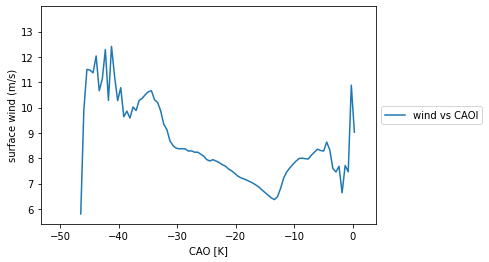

In [12]:
plot(2016)

In [ ]:
fig = plt.figure()

plt.scatter(cao, sw, marker='o', label='MAC-LWP + MERRA2')

#     plt.hexbin(cao, sw, gridsize=(15,15), cmap=plt.cm.Purples_r )
plt.xlabel('CAO [K]')
plt.ylabel('surface wind (m/s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

In [42]:
def cmip6(y):
    var = ['sfcWind', 'ts', 'ta']
    
    for i in range(len(var)):
        dpath  = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/piControl/r1i1p1f1/Amon/'+var[i]+'/gn/latest/'+var[i]+'_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc'
        data   = xr.open_dataset(dpath)
        globals()[var[i]] = data.variables[var[i]][:]
        
#         x = data.variables[var[i]][:]   #0:179,42:149,:
        
            #####potential temperature at 700hPa
    theta  = np.multiply(ta[0:179,3,42:149,:], ((np.divide(10,7))**(Rd/Cp)))
    
            #####potential temperature at surface
    thetas = np.multiply(ts[0:179,42:149,:], ((np.divide(10,10))**(Rd/Cp)))
    
    CAO_cmip6 = np.subtract(thetas, theta)
    print(np.shape(CAO_cmip6))
    print(np.shape(sfcWind[0:179,42:149,:]))
    
#     globals()['sfcWind'] = np.mean(np.mean(sfcWind[0:179,42:149,:],axis=2),axis=1)
    
# #     z = np.polyfit(CAO_cmip6, sfcWind, 3)
# #     poly = np.poly1d(z)
# #     zz = poly(CAO_cmip6)
    
    fig = plt.figure()
#     plt.plot(CAO, wind, label='MAC-LWP + MERRA2')
#     plt.scatter(CAO_cmip6, sfcWind[0:179,42:149,:], label='CMIP6')
#     plt.plot(CAO_cmip6, zz)
#     plt.title(calendar.month_name[m])
    plt.hexbin(CAO_cmip6, sfcWind[0:179,42:149,:], gridsize=(100,100), cmap=plt.cm.Purples_r )
    plt.xlabel('CAO [K]')
    plt.ylabel('surface wind (m/s)')
    plt.colorbar()
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show   
        
        
        
        

(179, 107, 288)
(179, 107, 288)


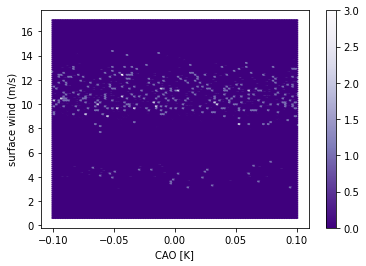

In [43]:
cmip6(1)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  import sys
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a sin

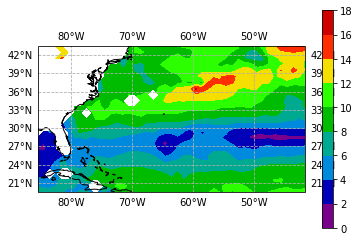

In [13]:
d_path = 'link/MACLWP_dailymean/wind1deg_maclwpv1.201601.nc4'
data   = xr.open_dataset(d_path)

lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

lat_ind1 = np.where(lat == lat[np.abs(lat - (20)).argmin()])[0]
lat_ind2 = np.where(lat == lat[np.abs(lat - (45)).argmin()])[0]
lon_ind1 = np.where(lon == lon[np.abs(lon - (275)).argmin()])[0]
lon_ind2 = np.where(lon == lon[np.abs(lon - (320)).argmin()])[0]

sfcwind= data.variables['sfcwind'][0,lat_ind1[0]:lat_ind2[0],lon_ind1[0]:lon_ind2[0]]
lat = lat[lat_ind1[0]:lat_ind2[0]]
lon = lon[lon_ind1[0]:lon_ind2[0]]

ax = plt.axes(projection=ccrs.PlateCarree())
#     ax.set_extent([-85, -41, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--')
# ax.set_title(modname[i]+' SH')
im = ax.contourf(lon, lat, sfcwind, cmap='nipy_spectral')
# plt.plot(145.014659, -37.785922,  markersize=2, marker='o', color='red')
plt.colorbar(im)
plt.show()